# 前沿网络案例-Deeplabv3

Deeplabv3是一个语义分割模型，语义分割是像素级的物体识别，目标是用对应的类（class）标记图像中的每个像素。因为我们要预测图像中的每个像素，所以此任务通常被称为密集预测。语义分割有着广泛的应用场景，例如自动驾驶，人机交互，医学图像诊断，计算摄影学和增强现实等。


## 实验介绍

本实验使用MindSpore深度学习框架构建DeepLabv3网络模型在PASCAL VOC2012数据集上进行图像语义分割。图像的语义分割是将输入图像中的每个像素分配一个语义类别，以得到像素级的密集分类。

### 实验目的

掌握DeepLabv3算法的基本原理以及点击率预测的实验流程。

### 实验环境

Notebook环境，硬件平台支持CPU/GPU，具体参考实验正文。



## 网络介绍

### 语义分割网络介绍

一般的语义分割架构可以被认为是一个编码器-解码器网络。编码器通常是一个预训练的分类网络，像 VGG、ResNet，然后是一个解码器网络。这些架构不同的地方主要在于解码器网络。解码器的任务是将编码器学习到的可判别特征（较低分辨率）从语义上投影到像素空间（较高分辨率），以获得密集分类。语义分割不仅需要在像素级有判别能力，还需要有能将编码器在不同阶段学到的可判别特征投影到像素空间的机制。不同的架构采用不同的机制（跳跃连接、金字塔池化等）作为解码机制的一部分。

### FCN网络介绍

自2014年 Long等人首次使用全卷积神经网络 (FCN)对自然图像进行端到端分割，语义分割才产生了大的突破。[FCN网络](https://arxiv.org/abs/1411.4038)将当前分类网络（AlexNet, VGG net等）修改为全卷积网络，通过对分割任务进行微调，将它们学习的表征转移到网络中。然后，定义了一种新的架构，将深的、粗糙的网络层的语义信息和浅的、精细的网络层的表层信息结合起来，来生成精确和详细的分割。FCN网络结构：FCN网络结构图如下所示。网络为卷积层和池化层的堆叠，特征图大小不断地减小，最后通过上采样的方式恢复图像分辨率。网络分为FCN-32s、FCN-16s、FCN-8s，分别代表上采样32、16、8倍的网络。以FCN-8s为例，将pool3输出的特征图上采样8倍、pool4输出的特征图上采样16倍、conv7的特征图上采样32倍。最后将三者的结果拼接在一起，以使用多个尺度的特征图。综合浅层特征的位置信息和深层特征的语义信息，这样在分割时就有足够的上下文信息(context information)，同时也有目标的细节信息。
FCN问题：在CNN中，低层的卷积中空间位置信息较为准确，但是感受野较小，只能关注附近像素点的信息。高层的卷积中感受野扩大，可以获取全局信息，但是目标空间位置信息损失严重，不能精确定位目标。而图像分割相较于分类任务需要更多的上下文信息和更精确的目标定位信息。

### DeepLab网络介绍

近来，深度卷积网络（DCNN）在高级视觉任务（图像分类和目标检测）中展示了优异的性能。DeepLabv1结合DCNN 和概率图模型来解决像素级分类任务（即语义分割）。其关键特点：
1. 提出 空洞卷积（atrous convolution）。
2. 在最后两个最大池化操作中不降低特征图的分辨率，并在倒数第二个最大池化之后的卷积中使用空洞卷积；
3. 使用 CRF（条件随机场） 作为后处理，恢复边界细节，达到准确定位效果；
4. 附加输入图像和前四个最大池化层的每个输出到一个两层卷积，然后拼接到主网络的最后一层，达到 多尺度预测效果。

DeepLabv2关键特点：
1. 强调上采样过滤器的卷积，或“空洞卷积”，在密集预测任务中是一个强大的工具。空洞卷积允许显式地控制在深度卷积神经网络中计算的特征响应的分辨率。它还允许有效地扩大过滤器的视野，在不增加参数数量或计算量的情况下引入更大的上下文；
2. 提出了一种空洞空间金字塔池化（ASPP）的多尺度鲁棒分割方法。ASPP 使用多个采样率的过滤器和有效的视野探测传入的卷积特征层，从而在多个尺度上捕获目标和图像上下文；
3.	结合 DCNNs 方法和概率图形模型，改进了目标边界的定位。DCNNs 中常用的最大池化和下采样的组合实现了不变性，但对定位精度有一定的影响。通过将 DCNN 最后一层的响应与一个全连接条件随机场(CRF)相结合来克服这个问题。

[DeepLabv3网络](https://arxiv.org/pdf/1706.05587.pdf)相较于之前的DeepLabv2有很大的改进，在PASCAL VOC2012图像语义分割基准上获得了state-of-art的性能。其关键特点： 

1. 为了解决多尺度目标的分割问题，串行/并行设计了能够捕捉多尺度上下文的模块，模块中采用不同的空洞率。结构如下图（图片来源于原论文）所示：

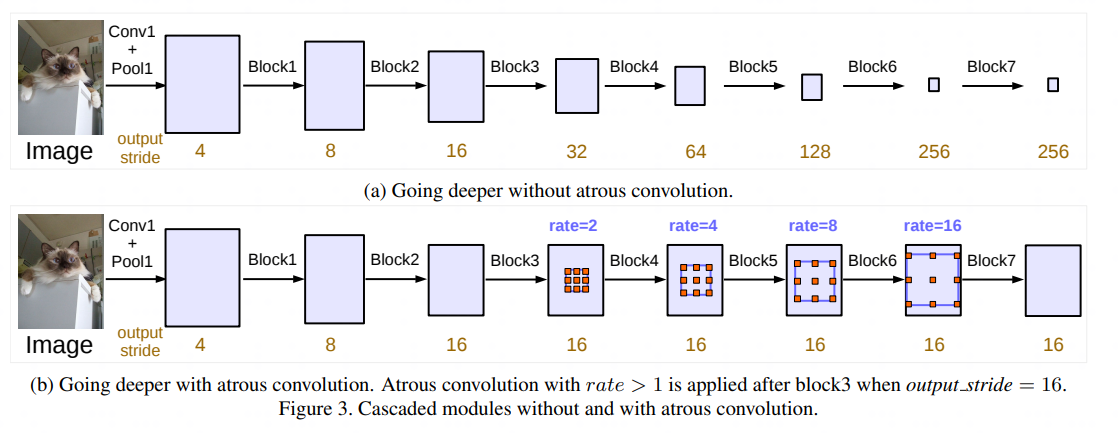


2. 增强了先前提出的空洞空间金字塔池化（ASPP）模块，增加了图像级特征来编码全局上下文，使得模块可以在多尺度下探测卷积特征。并在没有 CRF 作为后处理的情况下显著提升了性能。ASPP模块结构如下图（图片来源于原论文）所示：

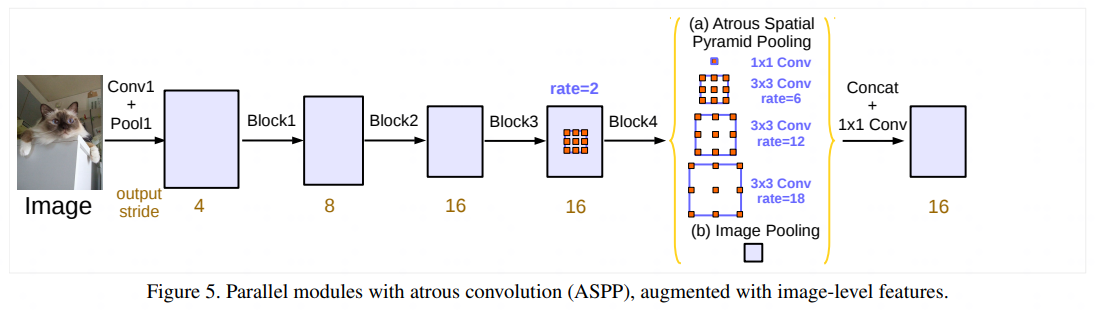


## 数据集

### 数据介绍

VOC2012（Visual Object Classes Challenge 2012）数据集来自2012年的PASCAL VOC大赛。PASCAL VOC 大赛是一项世界级的计算机视觉挑战赛，该挑战赛由 Mark Everingham、Luc Van Gool、Chris Williams、John Winn 和 Andrew Zisserman 发起，并在 2005 至 2012 年期间举办，比赛项目包括图像分类（Object Classification）、目标检测（Object Detection）、目标分割（Object Segmentation）、人体关节点识别（Human Layout）、动作识别（Action Classification）几大类。

PASCAL VOC2012数据集是针对计算机视觉任务中监督学习的数据集，它主要有四个大类别，分别是人、常见动物、交通车辆、室内家具用品，其中又细分20 个小类（加背景 21 类）。数据下载的链接：http://host.robots.ox.ac.uk:8080/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

详细类别如下所示：
- Person: person
- Animal: bird, cat, cow, dog, horse, sheep
- Vehicle: aeroplane, bicycle, boat, bus, car, motorbike, train
- Indoor: bottle, chair, dining table, potted plant, sofa, tv/monitor

VOC原始数据集包含以下目录结构：

```
./VOCdevkit/VOC2012
    ├── Annotations   # 目标检测任务标签，xml 形式，文件名与图片名对应
    ├── ImageSets  # 存放的是图片数据的编号名称，可根据编号在JPEGImages文件中找到参与训练和测试的数据图片。
       ├── Action        # 行为识别（包含数据编号和标签）,格式.txt 
       ├── Layout        # 人体部位识别（包含数据编号和标签）,格式.txt
       ├── Main          # 分类（包含数据编号和标签）,格式.txt
       └──Segmentation   # 语义分割（包含数据编号，无对应标签，标签参考文件SegmentationClass）。
           ├── trainval.txt
           ├── val.txt
           └── train.txt
    ├── JPEGImages            # 数据集所有原图（彩色三通道），格式.jpg
    ├── SegmentationClass     # 语义分割标签图（彩色三通道）,格式.png
    └── SegmentationObject    # 实例分割标签图（彩色三通道）,格式.png
```

本实验使用的是分割数据集的训练图片有1464张，验证集有1449张。


### 数据下载

这里对数据进行了一系列的预处理，为了将重点聚焦到模型，此处将数据预处理后的结果转换为 MindRecord 格式的数据，以省略大部分数据预处理的代码。本文使用 `download` 接口下载数据集，并将下载后的数据集自动解压到当前目录下。数据下载之前需要使用 `pip install download` 安装 `download` 包。代码如下：

In [1]:
from download import download

url = "https://ascend-professional-construction-dataset.obs.cn-north-4.myhuaweicloud.com:443/deep-learning/deeplabv3-mindspore/DeepLabv3_data.zip"

download(url, ".", kind="zip", replace=True)

### 数据集加载

使用 MindSpore 的 `MindDataset` 接口读取和解析数据集，然后将数据集进行混洗操作和批处理。

In [2]:
import os
import time

import numpy as np

import mindspore as ms
from mindspore import Tensor, context, ops
import mindspore.common.dtype as mstype
import mindspore.nn as nn
from mindspore import load_checkpoint, load_param_into_net
from mindspore.dataset import MindDataset

context.set_context(mode=context.GRAPH_MODE, device_id=5, device_target="GPU")

batch_size = 8
num_classes = 21
freeze_bn = True
ignore_label = 255
train_epochs = 10
base_lr = 0.0005

# 加载mindrecord格式数据
data_file = './data/train_mindrecord'
print('data_file:', data_file)
data_set = MindDataset(dataset_files=data_file)
print("Datasize: ", data_set.get_dataset_size())
data_set = data_set.shuffle(buffer_size=batch_size * 10)
dataset = data_set.batch(batch_size, drop_remainder=True)
steps = dataset.get_dataset_size()
print("Steps: ", steps)

data_file: ./data/train_mindrecord
Datasize:  1464
Steps:  183


## 模型构建

本实验的 DeepLabv3 模型使用 ResNet 作为主干网络，模型的大概结构见上面网络介绍，以下代码主要完成DeepLabv3主体网络的构建，通过定义多个resnet cell结构组成整体的DeepLabv3网络，最终的网络是以类的方式进行定义，通过实例化即可创建对应的网络对象。

In [3]:


class Resnet(nn.Cell):
    def __init__(self, block, block_num, use_batch_statistics=True):
        super(Resnet, self).__init__()
        self.inplanes = 64
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, pad_mode='pad', padding=3,
                               weight_init='xavier_uniform')
        self.bn1 = nn.BatchNorm2d(self.inplanes, use_batch_statistics=use_batch_statistics)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, pad_mode='same')
        self.layer1 = self._make_layer(block, 64, block_num[0], use_batch_statistics=use_batch_statistics)
        self.layer2 = self._make_layer(block, 128, block_num[1], stride=2, use_batch_statistics=use_batch_statistics)

        self.layer3 = self._make_layer(block, 256, block_num[2], stride=1, base_dilation=2,
                                       use_batch_statistics=use_batch_statistics)
        self.layer4 = self._make_layer(block, 512, block_num[3], stride=1, base_dilation=4, grids=[1, 2, 4],
                                       use_batch_statistics=use_batch_statistics)

    def _make_layer(self, block, planes, blocks, stride=1, base_dilation=1, grids=None, use_batch_statistics=True):
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.SequentialCell([
                nn.Conv2d(self.inplanes, planes * block.expansion, kernel_size=1, stride=stride,
                          weight_init='xavier_uniform'),
                nn.BatchNorm2d(planes * block.expansion, use_batch_statistics=use_batch_statistics)
            ])

        if grids is None:
            grids = [1] * blocks
        layers = [block(self.inplanes, planes, stride, downsample, dilation=base_dilation * grids[0],
                        use_batch_statistics=use_batch_statistics)]
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(
                block(self.inplanes, planes, dilation=base_dilation * grids[i],
                      use_batch_statistics=use_batch_statistics))

        return nn.SequentialCell(layers)

    def construct(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        return out


class Bottleneck(nn.Cell):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, dilation=1, use_batch_statistics=True):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, stride=1, weight_init='xavier_uniform')
        self.bn1 = nn.BatchNorm2d(planes, use_batch_statistics=use_batch_statistics)

        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, pad_mode='pad', padding=dilation,
                               dilation=dilation, weight_init='xavier_uniform')
        self.bn2 = nn.BatchNorm2d(planes, use_batch_statistics=use_batch_statistics)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, stride=1, weight_init='xavier_uniform')
        self.bn3 = nn.BatchNorm2d(planes * self.expansion, use_batch_statistics=use_batch_statistics)
        self.relu = nn.ReLU()
        self.downsample = downsample

    def construct(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv3(out)
        out = self.bn3(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out = ops.add(out, identity)
        out = self.relu(out)
        return out


class ASPPPooling(nn.Cell):
    def __init__(self, in_channels, out_channels, use_batch_statistics=True):
        super(ASPPPooling, self).__init__()
        self.conv = nn.SequentialCell([
            nn.Conv2d(in_channels, out_channels, kernel_size=1, weight_init='xavier_uniform'),
            nn.BatchNorm2d(out_channels, use_batch_statistics=use_batch_statistics),
            nn.ReLU()
        ])

    def construct(self, x):
        size = ops.shape(x)
        out = nn.AvgPool2d(size[2])(x)
        out = self.conv(out)
        out = ops.ResizeNearestNeighbor((size[2], size[3]), True)(out)
        return out


class ASPPConv(nn.Cell):
    def __init__(self, in_channels, out_channels, atrous_rate=1, use_batch_statistics=True):
        super(ASPPConv, self).__init__()
        if atrous_rate == 1:
            conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, has_bias=False, weight_init='xavier_uniform')
        else:
            conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, pad_mode='pad', padding=atrous_rate,
                             dilation=atrous_rate, weight_init='xavier_uniform')
        bn = nn.BatchNorm2d(out_channels, use_batch_statistics=use_batch_statistics)
        relu = nn.ReLU()
        self.aspp_conv = nn.SequentialCell([conv, bn, relu])

    def construct(self, x):
        out = self.aspp_conv(x)
        return out


class ASPP(nn.Cell):
    def __init__(self, atrous_rates, phase='train', in_channels=2048, num_classes=21,
                 use_batch_statistics=True):
        super(ASPP, self).__init__()
        self.phase = phase
        out_channels = 256
        self.aspp1 = ASPPConv(in_channels, out_channels, atrous_rates[0], use_batch_statistics=use_batch_statistics)
        self.aspp2 = ASPPConv(in_channels, out_channels, atrous_rates[1], use_batch_statistics=use_batch_statistics)
        self.aspp3 = ASPPConv(in_channels, out_channels, atrous_rates[2], use_batch_statistics=use_batch_statistics)
        self.aspp4 = ASPPConv(in_channels, out_channels, atrous_rates[3], use_batch_statistics=use_batch_statistics)
        self.aspp_pooling = ASPPPooling(in_channels, out_channels)
        self.conv1 = nn.Conv2d(out_channels * (len(atrous_rates) + 1), out_channels, kernel_size=1,
                               weight_init='xavier_uniform')
        self.bn1 = nn.BatchNorm2d(out_channels, use_batch_statistics=use_batch_statistics)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, num_classes, kernel_size=1, weight_init='xavier_uniform', has_bias=True)
        self.drop = nn.Dropout(0.3)

    def construct(self, x):
        x1 = self.aspp1(x)
        x2 = self.aspp2(x)
        x3 = self.aspp3(x)
        x4 = self.aspp4(x)
        x5 = self.aspp_pooling(x)

        x = ops.cat((x1, x2), axis=1)
        x = ops.cat((x, x3), axis=1)
        x = ops.cat((x, x4), axis=1)
        x = ops.cat((x, x5), axis=1)

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        if self.phase == 'train':
            x = self.drop(x)
        x = self.conv2(x)
        return x


class DeepLabV3(nn.Cell):
    def __init__(self, phase='train', num_classes=21, freeze_bn=False):
        super(DeepLabV3, self).__init__()
        use_batch_statistics = not freeze_bn
        self.resnet = Resnet(Bottleneck, [3, 4, 23, 3],
                             use_batch_statistics=use_batch_statistics)
        self.aspp = ASPP([1, 6, 12, 18], phase, 2048, num_classes, use_batch_statistics=use_batch_statistics)

    def construct(self, x):
        size = ops.shape(x)
        out = self.resnet(x)
        out = self.aspp(out)
        out = ops.interpolate(out, size=(size[2], size[3]), mode='bilinear')

        return out


## 优化器和损失函数

这里使用自定义的学习率和损失函数，具体情况见下文代码：

In [4]:
# 自定义学习率
def cosine_lr(base_lr, decay_steps, total_steps):
    lr = []
    for i in range(total_steps):
        step_ = min(i, decay_steps)
        lr.append(base_lr * 0.5 * (1 + np.cos(np.pi * step_ / decay_steps)))
    return lr


# 自定义损失函数
class SoftmaxCrossEntropyLoss(nn.Cell):
    def __init__(self, num_cls=21, ignore_label=255):
        super(SoftmaxCrossEntropyLoss, self).__init__()
        self.one_hot = ops.OneHot(axis=-1)
        self.on_value = Tensor(1.0, mstype.float32)
        self.off_value = Tensor(0.0, mstype.float32)
        self.cast = ops.Cast()
        self.ce = nn.SoftmaxCrossEntropyWithLogits()
        self.num_cls = num_cls
        self.ignore_label = ignore_label

    def construct(self, logits, labels):
        labels_int = labels.int()
        labels_int = ops.reshape(labels_int, (-1,))
        logits_ = ops.transpose(logits, (0, 2, 3, 1))
        logits_ = ops.reshape(logits_, (-1, self.num_cls))
        weights = ops.ne(labels_int, self.ignore_label)
        weights = weights.float()

        one_hot_labels = self.one_hot(labels_int, self.num_cls, self.on_value, self.off_value)
        loss = self.ce(logits_, one_hot_labels)
        loss = ops.mul(weights, loss)
        loss = ops.div(ops.sum(loss), ops.sum(weights))
        return loss

# 实例化模型
network = DeepLabV3('train', num_classes, freeze_bn)

# 加载权重文件
ckpt_file = './data/deeplabv3.ckpt'
print('cfg.ckpt_file: ', ckpt_file)
param_dict = load_checkpoint(ckpt_file)
load_param_into_net(network, param_dict)
print('Model load over!')

# 实例化损失函数
loss_ = SoftmaxCrossEntropyLoss(num_classes, ignore_label)

# 优化器
total_train_steps = steps * train_epochs
lr_iter = cosine_lr(base_lr, total_train_steps, total_train_steps)
opt = nn.Momentum(params=network.trainable_params(), learning_rate=lr_iter, momentum=0.9)

cfg.ckpt_file:  ./data/deeplabv3.ckpt
Model load over!


## 模型训练

为了节省训练时间，本实验采用 fine-tune 的训练方式，本文提供预训练模型，将预训练的checkpoint文件（deeplab_v3_s8-300_11.ckpt）

进行模型训练之前，需要搭建模型前向计算损失，以及计算梯度和反向传播的过程过程，详情如下代码：

In [5]:
def forward_fn(data):
    output = network(data["data"])
    net_loss = loss_(output, data["label"])
    return net_loss


grad_fn = ms.value_and_grad(forward_fn, None, network.trainable_params())


def train_step(data):
    loss, grads = grad_fn(data)
    loss = ops.depend(loss, opt(grads))
    return loss

save_ckpt_dir = './train_ckpt_outputs/'

print('Training begins!')
for epoch in range(train_epochs):
    epoch_loss = []
    for step, data in enumerate(dataset.create_dict_iterator()):
        begin_time = time.time()
        loss = train_step(data)
        end_time = time.time()
        times = end_time - begin_time
        loss = loss.asnumpy()
        epoch_loss.append(loss)
        if step % 10 == 0:
            print(f"Epoch:[{int(epoch + 1):>3d}/{int(train_epochs):>3d}], "
                  f"step:[{int(step):>4d}/{int(steps):>4d}], "
                  f"loss:{loss:>4f} , "
                  f"time:{times:>3f}s, ")
    m_loss = sum(epoch_loss) / steps
    print(f"Epoch:[{int(epoch + 1):>3d}/{int(train_epochs):>3d}], "
          f"Mean loss:{m_loss:>4f}")
    if epoch > 0:
        if (epoch + 1) % 5 == 0:
            os.makedirs(save_ckpt_dir, exist_ok=True)
            ms.save_checkpoint(network,
                               os.path.join(save_ckpt_dir, f"./deeplabv3_{epoch + 1}_{steps}.ckpt"))
print('End of training!')

Training begins!
Epoch:[  1/ 20], step:[   0/ 183], loss:0.002202 , time:5.131844s, 
Epoch:[  1/ 20], step:[  10/ 183], loss:0.005215 , time:1.549896s, 
Epoch:[  1/ 20], step:[  20/ 183], loss:0.003238 , time:1.561860s, 
Epoch:[  1/ 20], step:[  30/ 183], loss:0.004754 , time:1.557786s, 
.... 
Epoch:[  1/ 20], step:[ 170/ 183], loss:0.002633 , time:1.568266s, 
Epoch:[  1/ 20], step:[ 180/ 183], loss:0.006274 , time:1.570129s, 
Epoch:[  1/ 20], Mean loss:0.005246
Epoch:[  2/ 20], step:[   0/ 183], loss:0.007966 , time:1.584259s, 
Epoch:[  2/ 20], step:[  10/ 183], loss:0.005198 , time:1.577017s, 
Epoch:[  2/ 20], step:[  20/ 183], loss:0.002250 , time:1.577752s, 
.... 
Epoch:[  4/ 20], step:[ 160/ 183], loss:0.002930 , time:1.571051s, 
Epoch:[  4/ 20], step:[ 170/ 183], loss:0.004154 , time:1.584213s, 
Epoch:[  4/ 20], step:[ 180/ 183], loss:0.005930 , time:1.574775s, 
Epoch:[  4/ 20], Mean loss:0.003879
Epoch:[  5/ 20], step:[   0/ 183], loss:0.007206 , time:1.591016s, 
Epoch:[  5/ 20]

## 模型验证

以下代码构建验证网络，这里使用的评价指标为平均交并比（MIOU）。

用于验证的数据集为原始数据集，下载链接：http://host.robots.ox.ac.uk:8080/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

将下载的数据集解压在本文件同一目录下。

In [6]:
import os
import cv2
from PIL import Image

def cal_hist(a, b, n):
    k = (a >= 0) & (a < n)
    return np.bincount(n * a[k].astype(np.int32) + b[k], minlength=n ** 2).reshape(n, n)


def resize_long(img, long_size=513):
    h, w, _ = img.shape
    if h > w:
        new_h = long_size
        new_w = int(1.0 * long_size * w / h)
    else:
        new_w = long_size
        new_h = int(1.0 * long_size * h / w)
    imo = cv2.resize(img, (new_w, new_h))
    return imo


# 数据前处理函数
def pre_process(img_, crop_size=513):
    img_ = resize_long(img_, crop_size)
    resize_h, resize_w, _ = img_.shape

    image_mean = [103.53, 116.28, 123.675],
    image_std = [57.375, 57.120, 58.395],
    image_mean = np.array(image_mean)
    image_std = np.array(image_std)
    img_ = (img_ - image_mean) / image_std

    pad_h = crop_size - img_.shape[0]
    pad_w = crop_size - img_.shape[1]
    if pad_h > 0 or pad_w > 0:
        img_ = cv2.copyMakeBorder(img_, 0, pad_h, 0, pad_w, cv2.BORDER_CONSTANT, value=0)

    img_ = img_.transpose((2, 0, 1))
    return img_, resize_h, resize_w


def eval(batch_size, eval_net, img_list, crop_size=513, flip=True):
    result_lst = []
    len_img_list = len(img_list)
    batch_img = np.zeros((batch_size, 3, crop_size, crop_size), dtype=np.float32)
    resize_hw = []
    for l in range(len_img_list):
        img_ = img_list[l]
        img_, resize_h, resize_w = pre_process(img_, crop_size)
        batch_img[l] = img_
        resize_hw.append([resize_h, resize_w])

    batch_img = np.ascontiguousarray(batch_img)
    net_out = eval_net(Tensor(batch_img, mstype.float32))
    net_out = net_out.asnumpy()

    if flip:
        batch_img = batch_img[:, :, :, ::-1]
        net_out_flip = eval_net(Tensor(batch_img, mstype.float32))
        net_out += net_out_flip.asnumpy()[:, :, :, ::-1]

    for bs in range(batch_size):
        probs_ = net_out[bs][:, :resize_hw[bs][0], :resize_hw[bs][1]].transpose((1, 2, 0))
        ori_h, ori_w = img_list[bs].shape[0], img_list[bs].shape[1]
        probs_ = cv2.resize(probs_, (ori_w, ori_h))
        result_lst.append(probs_)

    result_msk = []
    for i in result_lst:
        result_msk.append(i.argmax(axis=2))
    return result_msk


batch_size = 1
crop_size = 513
num_classes = 21

data_file = './VOCdevkit/VOC2012/'
data_list = os.path.join(data_file, 'ImageSets/Segmentation/val.txt')
voc_img_dir = os.path.join(data_file, 'JPEGImages/')
voc_anno_dir = os.path.join(data_file, 'SegmentationClass')
voc_anno_gray_dir = os.path.join(data_file, 'SegmentationClassGray/')

if os.path.exists(voc_anno_gray_dir):
    print('the gray file is already exists！')
else:
    os.makedirs(voc_anno_gray_dir)
    # convert voc color png to gray png
    print('Converting voc color png to gray png ...')
    for ann in os.listdir(voc_anno_dir):
        ann_im = Image.open(os.path.join(voc_anno_dir, ann))
        ann_im = Image.fromarray(np.array(ann_im))
        ann_im.save(os.path.join(voc_anno_gray_dir, ann))
    print('Converting done!')

# 模型加载
ckpt_file = './train_ckpt_outputs/deeplabv3_10_183.ckpt'
print('loading checkpoing:', ckpt_file)
param_dict = load_checkpoint(ckpt_file)
load_param_into_net(network, param_dict)
network.set_train(False)
print("Model load over!")

with open(data_list) as f:
    img_list = f.readlines()
print("Eval data size: ", len(img_list))

hist = np.zeros((num_classes, num_classes))
for i, line in enumerate(img_list):
    id_ = line.strip()
    img_path = os.path.join(voc_img_dir, id_ + '.jpg')
    msk_path = os.path.join(voc_anno_gray_dir, id_ + '.png')
    img_ = cv2.imread(img_path)
    msk_ = cv2.imread(msk_path, cv2.IMREAD_GRAYSCALE)
    batch_res = eval(batch_size, network, [img_], crop_size=crop_size, flip=True)
    hist += cal_hist(msk_.flatten(), batch_res[0].flatten(), 21)

    if (i + 1) % 100 == 0:
        print('processed {} images'.format(i + 1))

iu = np.diag(hist) / np.maximum((hist.sum(1) + hist.sum(0) - np.diag(hist)), 1)
print('per-class IoU:', iu)
print('mean IoU:', np.nanmean(iu))

the gray file is already exists！
loading checkpoing: ./train_ckpt_outputs/deeplabv3_10_183.ckpt
Model load over!
Eval data size:  1449
processed 100 images
processed 200 images
processed 300 images
processed 400 images
processed 500 images
processed 600 images
processed 700 images
processed 800 images
processed 900 images
processed 1000 images
processed 1100 images
processed 1200 images
processed 1300 images
processed 1400 images
per-class IoU: [0.94285374 0.92697362 0.48320385 0.8920014  0.75606746 0.77674828
 0.92779341 0.86115015 0.9153642  0.4039191  0.87042523 0.58152348
 0.8509244  0.9046253  0.84186783 0.878922   0.53501856 0.82918014
 0.45429728 0.8314169  0.80128739]
mean IoU: 0.774550654301025
